In [1]:
import pandas as pd
import numpy as np
from data_clean import data_clean
from sklearn.model_selection import train_test_split
from machine_learn_models import *
data = pd.read_csv('data/data_after_clean.csv', index_col=[0])


In [2]:
# 数据清晰
data = pd.read_csv('data/train.csv')
data = data_clean(data)
data.to_csv('data/data_after_clean.csv')

In [2]:
columns_list = list(data.columns)
label_column = 'isDefault'
columns_list.remove(label_column)
features = data[columns_list].copy()
labels = data[label_column].copy()
test_size = 0.3
seed = 1466
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=seed)

In [3]:
regression_result = regression_model(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

系数的 t 值:	 id               0.192906
loanAmnt       -10.976276
term            29.948493
interestRate    -3.191784
installment     14.018167
                  ...    
G1               7.889884
G2               7.068454
G3               9.317210
G4               6.568992
G5               8.790021
Length: 88, dtype: float64
系数的 p 值:	 id               8.470323e-01
loanAmnt         5.002756e-28
term            6.595336e-197
interestRate     1.414048e-03
installment      1.228116e-44
                    ...      
G1               3.030070e-15
G2               1.568505e-12
G3               1.198512e-20
G4               5.070108e-11
G5               1.499417e-18
Length: 88, dtype: float64
模型的 AUC 值:
 0.7128002944009528
模型的 Acc 值:
 0.8015416666666667


In [32]:
t_values

id              -0.274777
loanAmnt       -13.028467
term            35.658293
interestRate    -2.462751
installment     16.650718
                  ...    
G1               8.644482
G2               8.728902
G3              10.238633
G4               9.179925
G5              10.298505
Length: 88, dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 89 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   employmentTitle     800000 non-null  float64
 6   homeOwnership       800000 non-null  int64  
 7   annualIncome        800000 non-null  float64
 8   verificationStatus  800000 non-null  int64  
 9   issueDate           800000 non-null  int64  
 10  isDefault           800000 non-null  int64  
 11  purpose             800000 non-null  int64  
 12  postCode            800000 non-null  float64
 13  regionCode          800000 non-null  int64  
 14  dti                 800000 non-null  float64
 15  delinquency_2years  800000 non-nul

In [39]:
data = data.apply(lambda x : x.fillna(x.mode().iloc[0]), axis=0)

In [3]:
from utils import categorize_columns
cloumns_group = categorize_columns(data)

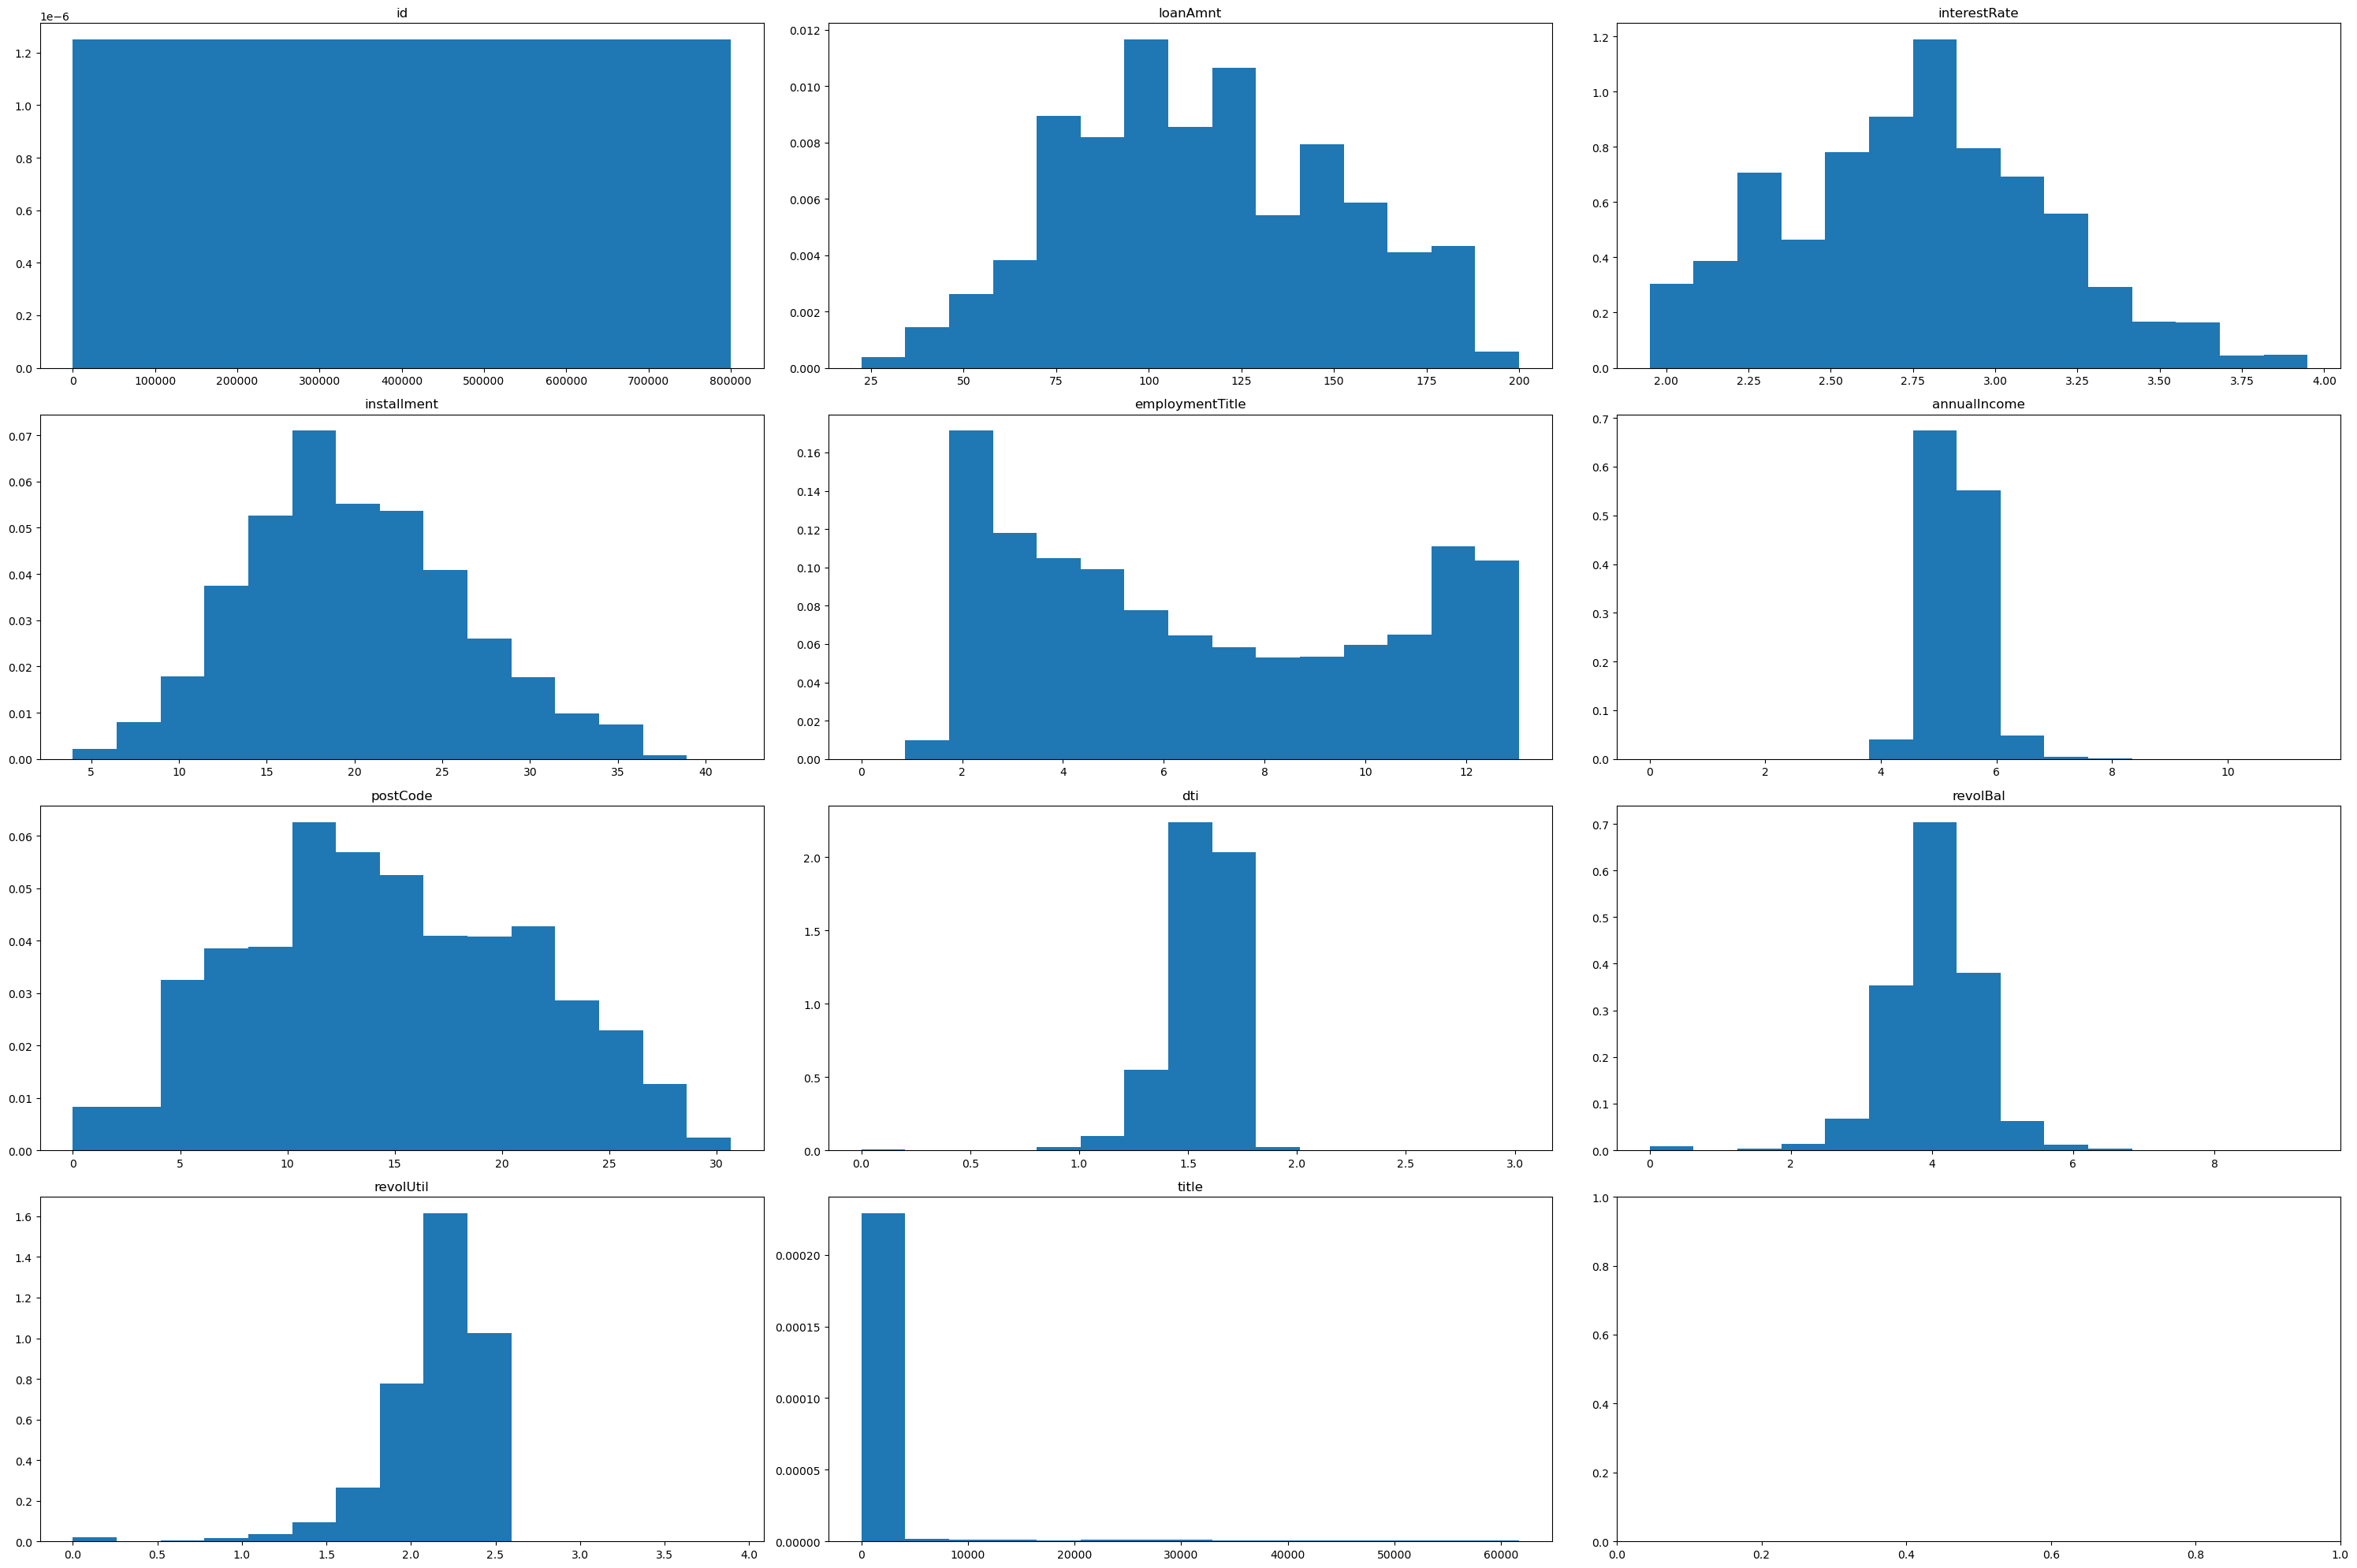

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
# 连续值处理
data['loanAmnt'] = np.power(data['loanAmnt'], 0.5)
data['interestRate'] = np.power(data['interestRate'], 0.4)
data['installment'] = np.power(data['installment'], 0.5)
data['employmentTitle'] = np.power(data['employmentTitle'], 0.2)
data['annualIncome'] = np.power(data['annualIncome'], 0.15)
data['postCode'] = np.power(data['postCode'], 0.5)
data['dti'] = np.power(data['dti'], 0.16)
data['revolBal'] = np.power(data['revolBal'], 0.15)
data['revolUtil'] = np.power(data['revolUtil'], 0.2)


from utils import transform_date_to_int_by_order

data['earliesCreditLine'] = transform_date_to_int_by_order(data['earliesCreditLine'])
data['issueDate'] = transform_date_to_int_by_order(data['issueDate'])

plot_continuous_data = data[cloumns_group['continuous_columns']]
fig, axes = plt.subplots(ncols=3, nrows=int(len(plot_continuous_data.columns)/3)+1, figsize=(30, 20))
axes = axes.ravel()

for i, column in enumerate(plot_continuous_data.columns):
    axes[i].hist(plot_continuous_data[column], density=True, bins=15)  
    axes[i].set_title(column)  

plt.tight_layout()
plt.show()


In [110]:
plot_continuous_data[column].value_counts().values

array([233690, 227118, 139661, 119453,  55661,  19053,   5364],
      dtype=int64)

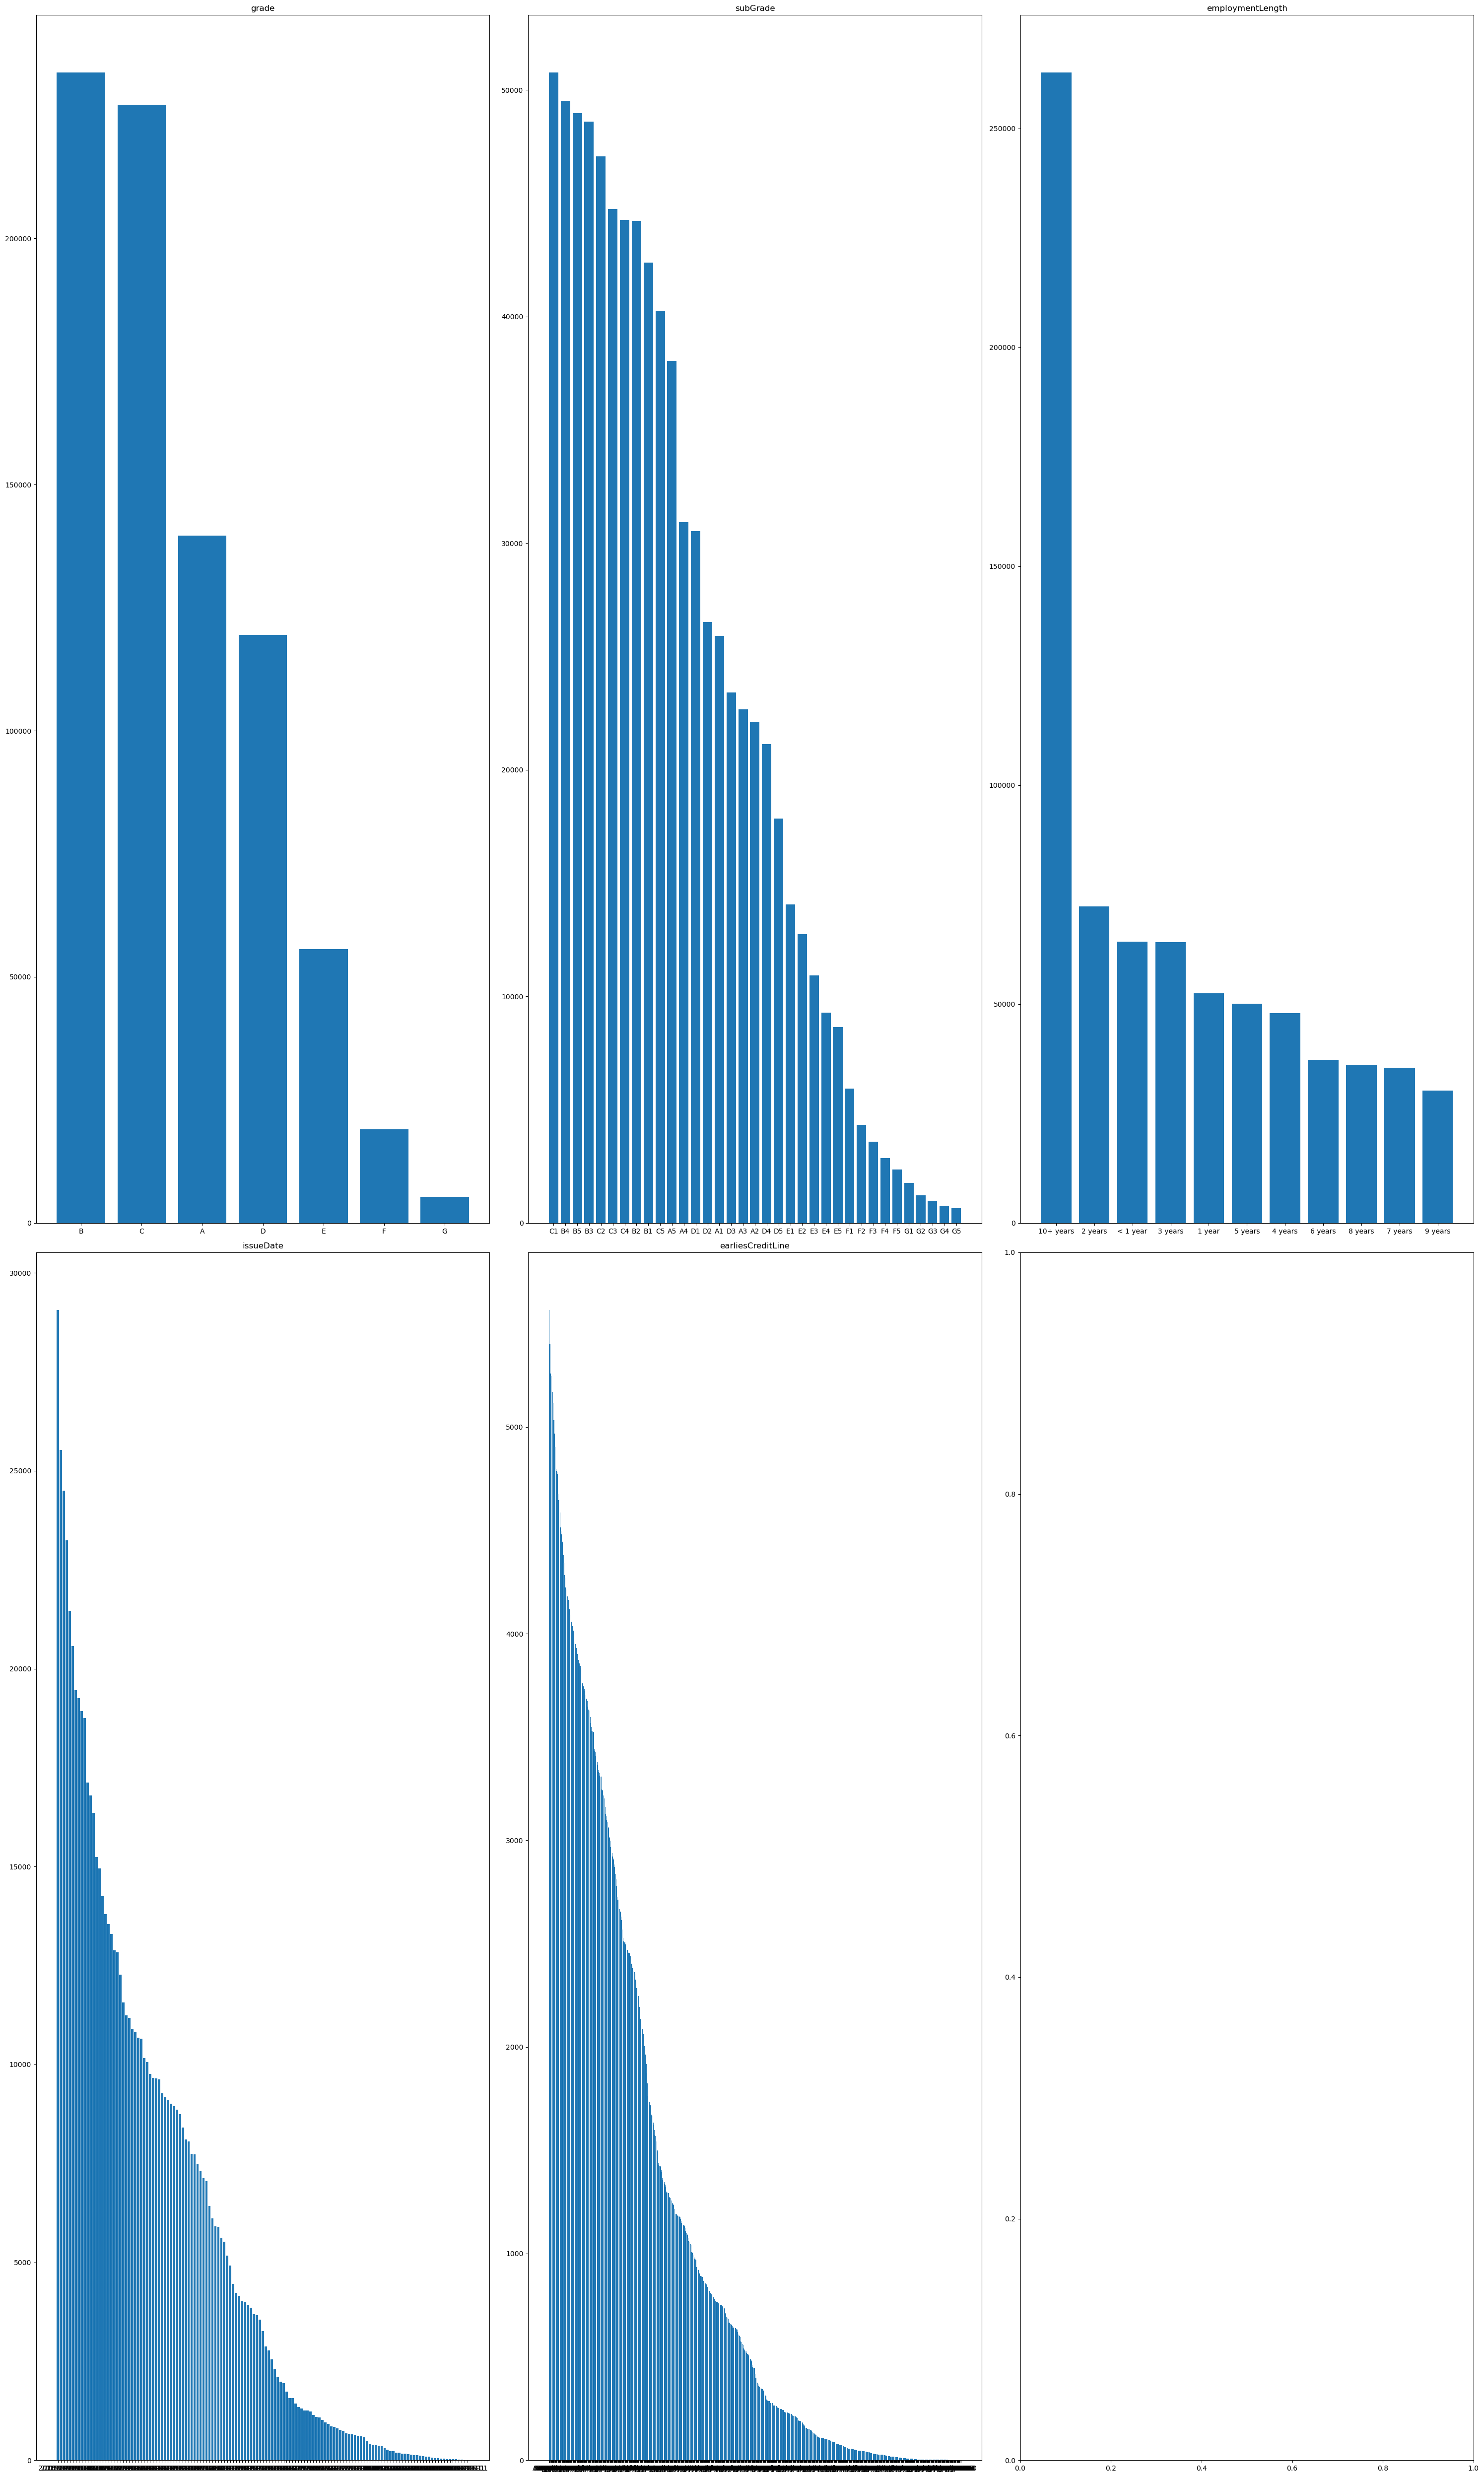

In [111]:
plot_continuous_data = data[cloumns_group['object_columns']]
fig, axes = plt.subplots(ncols=3, nrows=int(len(plot_continuous_data.columns)/3)+1, figsize=(30, 50))
axes = axes.ravel()

for i, column in enumerate(plot_continuous_data.columns):
    axes[i].bar(plot_continuous_data[column].value_counts().index, plot_continuous_data[column].value_counts().values)  
    axes[i].set_title(column)  

plt.tight_layout()
plt.show()

In [13]:
data = pd.read_csv('data/train.csv')
employmentLength_dummies = pd.get_dummies(data['employmentLength'])
subGrade_dummies = pd.get_dummies(data['subGrade'])
data = pd.concat([data, employmentLength_dummies], axis=1)
data = pd.concat([data, subGrade_dummies], axis=1)

data.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14', '1 year', '10+ years',
       '2 years', '3 years', '4 years', '5 years', '6 years', '7 years',
       '8 years', '9 years', '< 1 year', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype=

In [9]:
subGrade_dummies

(800000, 47)

In [2]:
from datetime import datetime

from utils import transform_date_to_int_by_order

data['earliesCreditLine'] = transform_date_to_int_by_order(data['earliesCreditLine'])
data['issueDate'] = transform_date_to_int_by_order(data['issueDate'])
data['earliesCreditLine']


0           0
1          40
2          98
3          91
4         433
         ... 
799995    224
799996    235
799997     26
799998    172
799999     65
Name: earliesCreditLine, Length: 800000, dtype: int64

In [3]:
data['earliesCreditLine']

0         Aug-2001
1         May-2002
2         May-2006
3         May-1999
4         Aug-1977
            ...   
799995    Aug-2011
799996    May-1989
799997    Jul-2002
799998    Jan-1994
799999    Feb-2002
Name: earliesCreditLine, Length: 800000, dtype: object

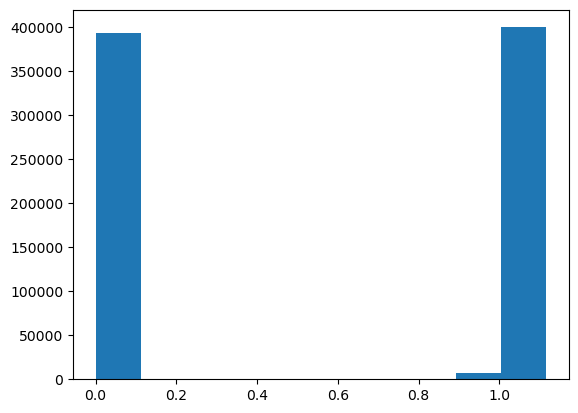

In [101]:
tem = (np.power(data['title'], 0.01)).copy()
plt.hist(tem)
plt.show()

In [82]:
data['loanAmnt'] = np.power(data['loanAmnt'], 0.5)
data['interestRate'] = np.power(data['interestRate'], 0.4)
data['installment'] = np.power(data['installment'], 0.5)
data['employmentTitle'] = np.power(data['employmentTitle'], 0.2)
data['annualIncome'] = np.power(data['annualIncome'], 0.15)
data['postCode'] = np.power(data['postCode'], 0.5)
data['dti'] = np.power(data['dti'], 0.16)
data['revolBal'] = np.power(data['revolBal'], 0.15)
data['revolUtil'] = np.power(data['revolUtil'], 0.2)

0          3.169786
1         11.706378
2          7.947058
3          8.593089
4          2.220643
            ...    
799995     4.841096
799996     7.817924
799997     4.812727
799998     2.727692
799999     1.670278
Name: employmentTitle, Length: 800000, dtype: float64